# Sheet 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

## 2 Projection Trick

(a)

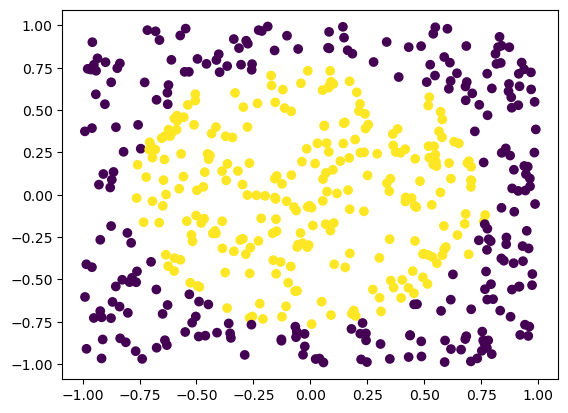

In [2]:
# Load the data
xy = np.load('data03/data2d.npy')
labels = np.load('data03/labels.npy')

# TODO: Plot the data
plt.scatter(*xy.T, c = labels)

accuracy = 55.80%


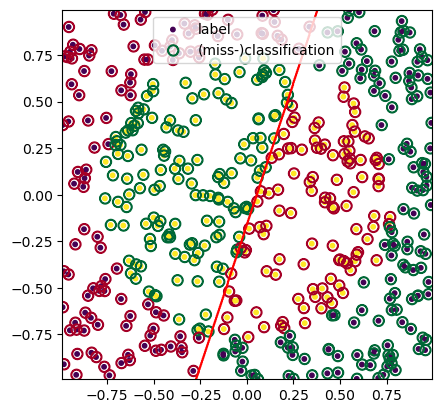

In [3]:
from sklearn.linear_model import LogisticRegression

# fit logistic regression
model = LogisticRegression()
model.fit(xy, labels)

# compute the accuracy
accuracy = (model.predict(xy) == labels).mean()
print(f'{accuracy = :.2%}')

# visualize the decision boundary
X = np.linspace(np.min(xy), np.max(xy), 500)
grid = np.array([[x, y] for x in X for y in X])

plt.gca().set_aspect('equal')
plt.scatter(*xy.T, s = 10, c = labels, label = 'label')
plt.scatter(*xy.T, s = 70, c = (model.predict(xy) == labels), marker = '$◯$', cmap = 'RdYlGn', label = '(miss-)classification')
plt.contour(X, X, model.predict(grid).reshape(len(X), len(X)).T, levels = (0.5, ), colors = ('red', ))
_ = plt.legend()

(b)

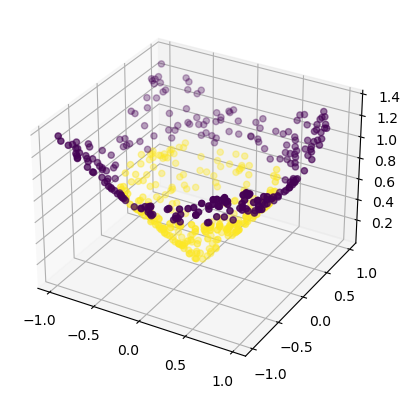

In [4]:
# Come up with a nonlinear tranformation for the third feature. Compute it and concatenate to the data.
radius = np.sqrt(np.sum(xy**2, axis = 1))
xyz = np.concatenate([xy, radius[:, None]], axis = 1)

# Show the enhanced data, e.g. with a 3D scatter plot 
ax = plt.figure().add_subplot(projection='3d')
ax.scatter3D(*xyz.T, c = labels)

In [6]:
# again, fit and evaluate logistic regression
model = LogisticRegression()
model.fit(xyz, labels)

accuracy = (model.predict(xyz) == labels).mean()

print(f'{accuracy = :.2%}')

accuracy = 98.80%


## 3) Linear regions of MLPs

(a)

In [ ]:
# TODO: define NN architecture

In [ ]:
# TODO: instantiate the model and make the visualizations as requested in the task

(b)

In [ ]:
# TODO: instantiate the model and make the visualizations as requested in the task

(c)

In [ ]:
# TODO: instantiate the model and make the visualizations as requested in the task

(d)

In [ ]:
# TODO: define NN architecture

In [ ]:
# TODO: instantiate the model and make the visualizations as requested in the task